In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Kaggle api
!kaggle datasets download tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 97% 211M/218M [00:02<00:00, 67.2MB/s]
100% 218M/218M [00:02<00:00, 84.0MB/s]


In [4]:
!ls

cat-and-dog.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/training_set/training_set/cats'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  4001


In [7]:
import os
import shutil

# Source and destination directories
source_dir = "/content/training_set/training_set/cats"
destination_dir = "/content/train_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 1501  # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


1501 images moved to /content/train_data


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/training_set/training_set/dogs'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  4006


In [9]:
import os
import shutil

# Source and destination directories
source_dir = "/content/training_set/training_set/dogs"
destination_dir = "/content/train_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 1501  # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


1501 images moved to /content/train_data


In [10]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk("/content/train_data"))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  3001


In [11]:
file_names = os.listdir("/content/train_data")
print(file_names)

['dog.1582.jpg', 'cat.910.jpg', 'dog.1088.jpg', 'cat.3757.jpg', 'cat.3922.jpg', 'cat.2487.jpg', 'dog.1935.jpg', 'dog.1876.jpg', 'dog.2121.jpg', 'dog.3654.jpg', 'dog.632.jpg', 'cat.3039.jpg', 'cat.2940.jpg', 'cat.1172.jpg', 'dog.246.jpg', 'cat.695.jpg', 'dog.3502.jpg', 'cat.3568.jpg', 'cat.1017.jpg', 'dog.3516.jpg', 'dog.2393.jpg', 'cat.3772.jpg', 'dog.1036.jpg', 'cat.3317.jpg', 'dog.1178.jpg', 'dog.3366.jpg', 'cat.2130.jpg', 'dog.2189.jpg', 'dog.84.jpg', 'cat.2452.jpg', 'dog.3853.jpg', 'cat.3257.jpg', 'dog.3936.jpg', 'dog.3229.jpg', 'dog.3330.jpg', 'cat.3887.jpg', 'cat.3786.jpg', 'cat.3510.jpg', 'cat.779.jpg', 'cat.2392.jpg', 'cat.2056.jpg', 'dog.1055.jpg', 'dog.2027.jpg', 'dog.3178.jpg', 'dog.643.jpg', 'cat.2934.jpg', 'cat.2471.jpg', 'cat.1570.jpg', 'dog.1430.jpg', 'cat.444.jpg', 'dog.1373.jpg', 'cat.2873.jpg', 'cat.1879.jpg', 'dog.1229.jpg', 'cat.490.jpg', 'dog.570.jpg', 'cat.3208.jpg', 'cat.2329.jpg', 'cat.2321.jpg', 'dog.2334.jpg', 'cat.794.jpg', 'cat.2793.jpg', 'dog.2900.jpg', 'do

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

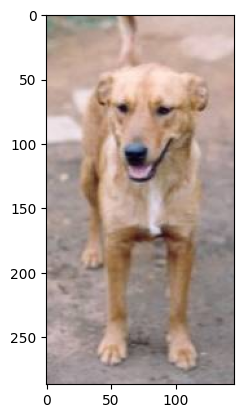

In [13]:
# display dog image
img = mpimg.imread('/content/train_data/dog.1582.jpg')
imgplt = plt.imshow(img)
plt.show()

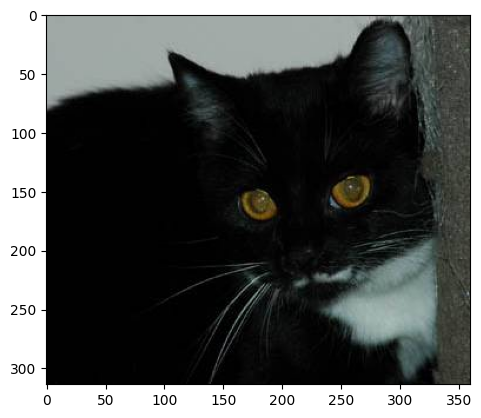

In [14]:
# display cat image
img = mpimg.imread('/content/train_data/cat.910.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir('/content/train_data/')

for i in range(10):
  name = file_names[i]
  print(name[0:3])


dog
cat
dog
cat
cat
cat
dog
dog
dog
dog


In [16]:
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 1500
Number of cat images = 1501


In [17]:
#creating a directory for resized images
os.mkdir('/content/train_image_resized')

In [18]:

import os
from PIL import Image

original_folder = "/content/train_data/"
output_folder = "/content/train_image_resized/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each file in the folder
for filename in os.listdir(original_folder):
    img_path = os.path.join(original_folder, filename)

    # Skip directories
    if os.path.isdir(img_path):
        continue

    try:
        # Open, resize, and save the image
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img.save(os.path.join(output_folder, filename))
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

print(f"All images resized and saved to {output_folder}")



Error processing file _DS_Store: cannot identify image file '/content/train_data/_DS_Store'
All images resized and saved to /content/train_image_resized/


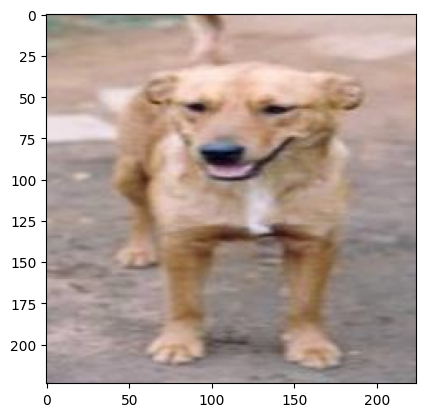

In [19]:
# display resized dog image
img = mpimg.imread('/content/train_image_resized/dog.1582.jpg')
imgplt = plt.imshow(img)
plt.show()

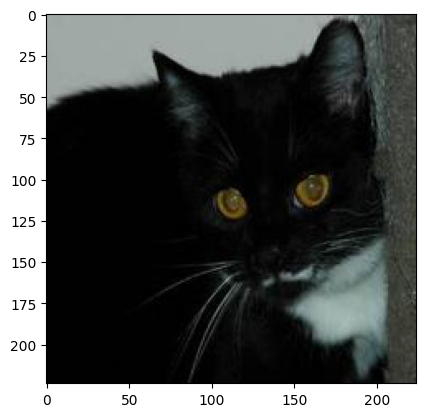

In [20]:
# display resized dog image
img = mpimg.imread('/content/train_image_resized/cat.910.jpg')
imgplt = plt.imshow(img)
plt.show()

In [21]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/train_image_resized')


labels = []

for i in range(len(filenames)):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [22]:
print(filenames[0:5])
print(len(filenames))

['dog.1582.jpg', 'cat.910.jpg', 'dog.1088.jpg', 'cat.3757.jpg', 'cat.3922.jpg']
3000


In [23]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
3000


In [24]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)


[0 1]
[1500 1500]


In [25]:

import cv2
import glob

In [26]:
image_directory = '/content/train_image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images[0])

[[[134 141 138]
  [134 141 138]
  [131 140 137]
  ...
  [182 189 209]
  [182 189 209]
  [182 189 209]]

 [[138 145 140]
  [138 145 140]
  [135 145 139]
  ...
  [183 190 210]
  [183 190 210]
  [183 190 210]]

 [[141 150 140]
  [141 150 140]
  [139 150 142]
  ...
  [184 191 211]
  [184 191 211]
  [184 191 211]]

 ...

 [[147 141 152]
  [145 139 150]
  [142 136 147]
  ...
  [132 131 133]
  [128 127 129]
  [126 125 127]]

 [[157 149 160]
  [153 145 156]
  [148 140 151]
  ...
  [131 130 132]
  [129 128 130]
  [128 127 129]]

 [[145 137 148]
  [143 135 146]
  [140 132 143]
  ...
  [136 135 137]
  [136 135 137]
  [137 136 138]]]


In [28]:

type(dog_cat_images)



numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(3000, 224, 224, 3)


In [30]:
X = dog_cat_images
y = np.asarray(labels)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [32]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(3000, 224, 224, 3) (2250, 224, 224, 3) (750, 224, 224, 3) (3000,) (2250,) (750,)


In [33]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled[0])

[[[0.43529412 0.50588235 0.50196078]
  [0.46666667 0.5372549  0.53333333]
  [0.42352941 0.48627451 0.48235294]
  ...
  [0.4        0.42352941 0.41960784]
  [0.48235294 0.50588235 0.50196078]
  [0.36862745 0.39607843 0.38431373]]

 [[0.50980392 0.58039216 0.58431373]
  [0.55294118 0.62352941 0.61960784]
  [0.47843137 0.5372549  0.54509804]
  ...
  [0.51372549 0.53333333 0.5372549 ]
  [0.56078431 0.58431373 0.58039216]
  [0.50980392 0.5372549  0.5254902 ]]

 [[0.55686275 0.62352941 0.63529412]
  [0.52941176 0.6        0.60392157]
  [0.39215686 0.45098039 0.4627451 ]
  ...
  [0.6627451  0.68235294 0.68627451]
  [0.59215686 0.61568627 0.61176471]
  [0.56862745 0.59215686 0.58823529]]

 ...

 [[0.75686275 0.78823529 0.78431373]
  [0.71764706 0.75294118 0.74117647]
  [0.70196078 0.73333333 0.72941176]
  ...
  [0.46666667 0.47058824 0.48627451]
  [0.49411765 0.49019608 0.50588235]
  [0.41960784 0.41568627 0.43137255]]

 [[0.71764706 0.75294118 0.74117647]
  [0.65098039 0.69019608 0.66666667]


In [35]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'



In [36]:
from tensorflow.keras import layers
import tensorflow_hub as hub
import tf_keras as keras
import tensorflow as tf
IMAGE_SHAPE = (224,224)

def create_model(model_url, num_classes):
  pretrained_model = hub.KerasLayer(
      mobilenet_model,
      input_shape=(224,224,3),
      trainable=False
      )

  model = keras.Sequential([
    pretrained_model,
    keras.layers.Dense(
        num_classes,
        activation='sigmoid',
        name='output_layer')
  ])
  return model

In [37]:
mobilenet_model = create_model(mobilenet_model, num_classes = 2)

mobilenet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])




In [38]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
# mobilenet_history = mobilenet_model.fit(X_train_scaled, y_train,
#                                   epochs=5,
#                                   steps_per_epoch=len(X_train_scaled),
#                                   #validation_data=X,
#                                   #validation_steps=len(test_data),
#                                   verbose = 1)

mobilenet_history = mobilenet_model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    steps_per_epoch=len(X_train_scaled),
    validation_data=(X_test_scaled, y_test),
    validation_steps=len(X_test_scaled),
    verbose=1
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2250/2250 [==============================] - 140s 59ms/step - loss: 0.1178 - accuracy: 0.9582 - val_loss: 0.1184 - val_accuracy: 0.9600
Epoch 2/5
2250/2250 [==============================] - 122s 54ms/step - loss: 0.0582 - accuracy: 0.9809 - val_loss: 0.0981 - val_accuracy: 0.9720
Epoch 3/5
2250/2250 [==============================] - 120s 53ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.1243 - val_accuracy: 0.9693
Epoch 4/5
2250/2250 [==============================] - 122s 54ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.1331 - val_accuracy: 0.9707
Epoch 5/5
2250/2250 [==============================] - 119s 53ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.1764 - val_accuracy: 0.9587


In [40]:
score, acc = mobilenet_model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

24/24 [==============================] - 27s 1s/step - loss: 0.1764 - accuracy: 0.9587
Test Loss = 0.176366925239563
Test Accuracy = 0.9586666822433472


In [43]:
mobilenet_model.save('mobilenet_model.h5')
mobilenet_model.save('cat_vs_dog_mobilenet_model.keras')

In [45]:
mobilenet_model.save('mobilenetv5_model')

In [55]:
print(len("/content/test_set/test_set/cats"))
print(len("/content/test_set/test_set/dogs"))


31
31


In [56]:
import os
import shutil

# Source and destination directories
source_dir = "/content/test_set/test_set/cats"
destination_dir = "/content/test_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 31 # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


31 images moved to /content/test_data


In [57]:
import os
import shutil

# Source and destination directories
source_dir = "/content/test_set/test_set/dogs"
destination_dir = "/content/test_data"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Counter to track the number of files moved
file_count = 0
max_files = 31 # Number of files to move

# Move files
for file_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)

    # Check if it's a file before moving
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
        file_count += 1

        # Stop after moving 1000 files
        if file_count >= max_files:
            break

print(f"{file_count} images moved to {destination_dir}")


31 images moved to /content/test_data


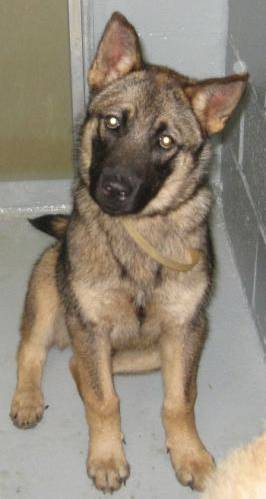

1/1 [==============================] - 0s 90ms/step
[[0.07880613 0.9812159 ]]
The image represents a Dog


In [63]:
import cv2
import numpy as np
import random
import glob
from google.colab.patches import cv2_imshow  # Only needed for Colab

# Get all image paths in the test set directory
test_image_paths = glob.glob('/content/test_data/*')  # Adjust the path as needed

# Check if there are any images in the directory
if len(test_image_paths) == 0:
    print("No images found in the test set directory.")
else:
    # Randomly select an image from the test set
    input_image_path = random.choice(test_image_paths)

    # Load and display the selected image
    input_image = cv2.imread(input_image_path)
    cv2_imshow(input_image)  # For Google Colab, use cv2_imshow to display the image

    # Preprocess the image
    input_image_resize = cv2.resize(input_image, (224, 224))  # Resize to match model input
    input_image_scaled = input_image_resize / 255.0  # Scale pixel values to [0, 1]
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])  # Reshape for model input

    # Make a prediction
    input_prediction = mobilenet_model.predict(image_reshaped)

    # Print the prediction output
    print(input_prediction)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    # Print the result
    if input_pred_label == 0:
        print('The image represents a Cat')
    else:
        print('The image represents a Dog')
